# Logistic Regression
An example of the steps for binary classification with logistic regression.

The provided data from an SUV dataset describe whether or not a certain customer purchased an SUV.

## 1. Library Imports and Data Loading

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("data/suv.csv")

In [3]:
df.info()
df.head()
df[["Age", "EstimatedSalary"]].describe()
df["Purchased"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


Purchased
0    257
1    143
Name: count, dtype: int64

## 2. Feature Selection

### 2.1. Correlation

<Axes: >

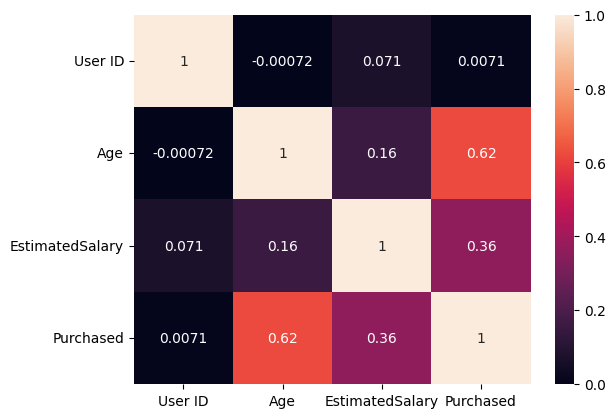

In [4]:
numeric = df.select_dtypes("number")
cor = numeric.corr()
sns.heatmap(cor, annot=True)

Based off of the correlation matrix, we will use Age and EstimatedSalary to predict whether or not an SUV will be purchased.

## 3. Building our Model

In [5]:
# Exract Data
X = df[["Age", "EstimatedSalary"]]
y = df["Purchased"]

# SPlit the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Create the model
model = LogisticRegression()

# Train the model 
model = model.fit(X_train, y_train)

## 4. Evaluating our Model

In [6]:
# Make prediction onf the test data
y_pred = model.predict(X_test)


Text(50.722222222222214, 0.5, 'Actual')

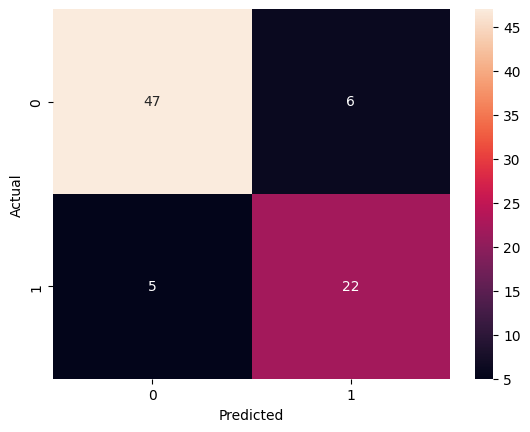

In [7]:
# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(conf_mat, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [8]:
# Calculate Accuracy Based on Confusion Matrix
model.score(X_test, y_test)

0.8625

## 5. Making New Predictions

In [9]:
# TODO: Take user input to make a prediction
# You can get user input with the input("Prompt") function
# this function will always return a String, so you may have to 
# cast it to an int
age = int(input("What is your age"))
salary = int(input("What is your salary"))
model.predict(age, salary)